# Verb and Voice Analysis

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import re

## STEP 1: Read in verb lists

In [ ]:
# NTU VERBS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/verbs_NTU.txt", "r") as f:
  ntu_verb_string = f.read()

# Convert to list
ntu_list = ntu_verb_string.split(",")

In [ ]:
# NTU AV VERBS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/av_verbs_NTU.txt", "r") as f:
  av_verb_string = f.read()

# Convert to list
av_list = av_verb_string.split(",")

In [ ]:
# NTU PV VERBS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/pv_verbs_NTU.txt", "r") as f:
  pv_verb_string = f.read()

# Convert to list
pv_list = pv_verb_string.split(",")

In [ ]:
# NTU LV VERBS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/lv_verbs_NTU.txt", "r") as f:
  lv_verb_string = f.read()

# Convert to list
lv_list = lv_verb_string.split(",")

In [ ]:
# NTU IV VERBS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/iv_verbs_NTU.txt", "r") as f:
  iv_verb_string = f.read()

# Convert to list
iv_list = iv_verb_string.split(",")

In [ ]:
# NTU VERB STEMS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/stems_NTU.txt", "r") as f:
  stem_string = f.read()

# Convert to list
stem_list = stem_string.split(",")

In [ ]:
# BIBLE VERBS
# Open and read file
with open("/content/drive/MyDrive/Part2/Verbs/verbs_Bible.txt", "r") as f:
  bible_verb_string = f.read()

# Convert to list
bible_list = bible_verb_string.split(",")

In [ ]:
# Create lists of unique verbs in NTU and Bible
ntu_unique = list(set(ntu_list))
bible_unique = list(set(bible_list))

In [ ]:
# Some basic numbers
print("Verbs in NTU Corpus:", len(ntu_list))
print("Unique verbs in NTU Corpus:", len(ntu_unique))
print("Verb stems in NTU Corpus:", len(stem_list))

print("\nAV verbs in NTU Corpus:", len(av_list))
print("Proportion of AV verbs in NTU Corpus:", round(len(av_list)/len(ntu_unique), 2))
print("\nPV verbs in NTU Corpus:", len(pv_list))
print("Proportion of PV verbs in NTU Corpus:", round(len(pv_list)/len(ntu_unique), 2))
print("\nLV verbs in NTU Corpus:", len(lv_list))
print("Proportion of LV verbs in NTU Corpus:", round(len(lv_list)/len(ntu_unique), 2))
print("\nIV verbs in NTU Corpus:", len(iv_list))
print("Proportion of IV verbs in NTU Corpus:", round(len(iv_list)/len(ntu_unique), 2))

print("\nVerbs in Bible:", len(bible_list))
print("Unique verbs in Bible:", len(bible_unique))

Verbs in NTU Corpus: 1174
Unique verbs in NTU Corpus: 665
Verb stems in NTU Corpus: 369

AV verbs in NTU Corpus: 253
Proportion of AV verbs in NTU Corpus: 0.38

PV verbs in NTU Corpus: 280
Proportion of PV verbs in NTU Corpus: 0.42

LV verbs in NTU Corpus: 105
Proportion of LV verbs in NTU Corpus: 0.16

IV verbs in NTU Corpus: 24
Proportion of IV verbs in NTU Corpus: 0.04

Verbs in Bible: 94214
Unique verbs in Bible: 4440




```
Verbs in NTU Corpus: 1174
Unique verbs in NTU Corpus: 665
Verb stems in NTU Corpus: 369

AV verbs in NTU Corpus: 253
Proportion of AV verbs in NTU Corpus: 0.38

PV verbs in NTU Corpus: 280
Proportion of PV verbs in NTU Corpus: 0.42

LV verbs in NTU Corpus: 105
Proportion of LV verbs in NTU Corpus: 0.16

IV verbs in NTU Corpus: 24
Proportion of IV verbs in NTU Corpus: 0.04

Verbs in Bible: 94214
Unique verbs in Bible: 4440
```



## STEP 2: Create dataframes for the NTU and Bible data

In [ ]:
# NTU
# Create a dictionary of verb frequencies
ntu_dict = {}
for verb in ntu_list:
  if verb not in ntu_dict:
    ntu_dict[verb] = 1
  else:
    ntu_dict[verb] += 1

In [ ]:
# Sort dictionary by frequency
# Create tuples of (verb, frequency)
sorted_ntu = sorted(ntu_dict.items(), key=lambda x: x[1], reverse=True)

In [ ]:
# Bible
# Create a dictionary of verb frequencies
bible_dict = {}
for verb in bible_list:
  if verb not in bible_dict:
    bible_dict[verb] = 1
  else:
    bible_dict[verb] += 1

In [ ]:
# Sort dictionary by frequency
# Create tuples of (verb, frequency)
sorted_bible = sorted(bible_dict.items(), key=lambda x: x[1], reverse=True)

In [ ]:
verb_data = [["Verb", "Frequency in NTU", "Rank in NTU", "Frequency in Bible", "Rank in Bible"]]
ntu_data = [["Verb", "Frequency in NTU", "Rank in NTU", "Voice", "Stem"]]
bible_data = [["Verb", "Frequency in Bible", "Rank in Bible"]]

# Create list of verbs, frequencies, and ranks in NTU
for i in range(len(sorted_ntu)):
  lst = []
  lst.append(sorted_ntu[i][0])
  lst.append(sorted_ntu[i][1])
  lst.append(i + 1)
  freq_bible, rank_bible = "N/A", "N/A"
  for j in range(len(sorted_bible)):
    if sorted_ntu[i][0] == sorted_bible[j][0]:
      freq_bible = sorted_bible[j][1]
      rank_bible = j + 1
  lst.append(freq_bible)
  lst.append(rank_bible)
  verb_data.append(lst)

# Extend to include verbs in Bible
for i in range(len(sorted_bible)):
  if not any(sorted_bible[i][0] in j for j in verb_data):
    lst = []
    lst.append(sorted_bible[i][0])
    lst.append("N/A")
    lst.append("N/A")
    lst.append(sorted_bible[i][1])
    lst.append(i + 1)
    verb_data.append(lst)

# Create a separate list for NTU
for i in range(len(sorted_ntu)):
  lst = []

  # Add the verb
  lst.append(sorted_ntu[i][0])

  # Add the verb's frequency
  lst.append(sorted_ntu[i][1])

  # Add the verb's rank
  lst.append(i + 1)

  # Add the verb's voice
  av, pv, lv, iv = 0, 0, 0, 0

  if sorted_ntu[i][0] in av_list:
    av = 1
  elif sorted_ntu[i][0] in pv_list:
    pv = 1
  elif sorted_ntu[i][0] in lv_list:
    lv = 1
  elif sorted_ntu[i][0] in iv_list:
    iv = 1

  # If it is in multiple lists or no lists, mark voice as unknown
  if (av + pv + lv + iv != 1):
    lst.append("unknown")
  # Otherwise mark the voice
  elif av == 1:
    lst.append("AV")
  elif pv == 1:
    lst.append("PV")
  elif lv == 1:
    lst.append("LV")
  elif iv == 1:
    lst.append("IV")

  # Add the verb's stem
  stem_check = 0
  for stem in stem_list:
    if re.search(stem, sorted_ntu[i][0]):
      lst.append(stem)
      stem_check = 1
      break
  if not stem_check:
    lst.append("[unknown]")
  ntu_data.append(lst)

# Create a separate list for Bible
for i in range(len(sorted_bible)):
  lst = []
  lst.append(sorted_bible[i][0])
  lst.append(sorted_bible[i][1])
  lst.append(i + 1)
  bible_data.append(lst)

In [ ]:
# Check the first few items
print(verb_data[:10])
print(ntu_data[:10])
print(bible_data[:10])

[['Verb', 'Frequency in NTU', 'Rank in NTU', 'Frequency in Bible', 'Rank in Bible'], ['nengnenghan', 28, 1, 'N/A', 'N/A'], ['mikilim', 19, 2, 'N/A', 'N/A'], ['minengneng', 17, 3, 207, 60], ['mipitpit', 16, 4, 'N/A', 'N/A'], ['manengneng', 12, 5, 5, 2325], ['maaraw', 11, 6, 'N/A', 'N/A'], ['mikalic', 11, 7, 'N/A', 'N/A'], ['miala', 10, 8, 172, 78], ['minukay', 10, 9, 4, 2843]]
[['Verb', 'Frequency in NTU', 'Rank in NTU', 'Voice', 'Stem'], ['nengnenghan', 28, 1, 'PV', 'nengneng'], ['mikilim', 19, 2, 'AV', 'kilim'], ['minengneng', 17, 3, 'AV', 'nengneng'], ['mipitpit', 16, 4, 'AV', 'pitpit'], ['manengneng', 12, 5, 'PV', 'nengneng'], ['maaraw', 11, 6, 'AV', 'araw'], ['mikalic', 11, 7, 'AV', 'kalic'], ['miala', 10, 8, 'AV', 'ala'], ['minukay', 10, 9, 'AV', 'nukay']]
[['Verb', 'Frequency in Bible', 'Rank in Bible'], ['caay', 6961, 1], ['yis', 2986, 2], ['ta', 1568, 3], ['dmak', 1521, 4], ['saan', 1451, 5], ['nanu', 1344, 6], ['tayra', 1269, 7], ['tamuwanan', 1230, 8], ['cingraan', 1052, 9]]


In [ ]:
# Create a dataframe for both NTU and Bible
verb_df = pd.DataFrame(verb_data[1:], columns=verb_data[0])

# Save to a CSV file
verb_df.to_csv("/content/drive/MyDrive/Part2/Analysis/verb_data.csv")

In [ ]:
# Create a dataframe for NTU only
ntu_df = pd.DataFrame(ntu_data[1:], columns=ntu_data[0])

# Save to a CSV file
ntu_df.to_csv("/content/drive/MyDrive/Part2/Analysis/ntu_data.csv")

# Create a dataframe for Bible only
bible_df = pd.DataFrame(bible_data[1:], columns=bible_data[0])

# Save to a CSV file
bible_df.to_csv("/content/drive/MyDrive/Part2/Analysis/bible_data.csv")

In [ ]:
verb_df.head(10)

,Verb,Frequency in NTU,Rank in NTU,Frequency in Bible,Rank in Bible
0,nengnenghan,28,1,N/A,N/A
1,mikilim,19,2,N/A,N/A
2,minengneng,17,3,207,60
3,mipitpit,16,4,N/A,N/A
4,manengneng,12,5,5,2325
5,maaraw,11,6,N/A,N/A
6,mikalic,11,7,N/A,N/A
7,miala,10,8,172,78
8,minukay,10,9,4,2843
9,tayra,9,10,1269,7


In [ ]:
ntu_df.head(10)

,Verb,Frequency in NTU,Rank in NTU,Voice,Stem
0,nengnenghan,28,1,PV,nengneng
1,mikilim,19,2,AV,kilim
2,minengneng,17,3,AV,nengneng
3,mipitpit,16,4,AV,pitpit
4,manengneng,12,5,PV,nengneng
5,maaraw,11,6,AV,araw
6,mikalic,11,7,AV,kalic
7,miala,10,8,AV,ala
8,minukay,10,9,AV,nukay
9,tayra,9,10,AV,tayra


Below are the translations of the 10 most frequent verbs in the NTU Corpus:
*   nengnenghan = see
*   mikilim = search
*   minengneng = see
*   mipitpit = pluck
*   manengneng = see
*   maaraw = see
*   mikalic = climb
*   miala = take
*   minukay = return
*   tayra = go

Most of these make sense, although the frequencies would probably be much different if we had a larger set of data. The more surprising verbs like "pluck" and "climb" are probably specific to the stories in the NTU Corpus.



In [ ]:
bible_df.head(10)

,Verb,Frequency in Bible,Rank in Bible
0,caay,6961,1
1,yis,2986,2
2,ta,1568,3
3,dmak,1521,4
4,saan,1451,5
5,nanu,1344,6
6,tayra,1269,7
7,tamuwanan,1230,8
8,cingraan,1052,9
9,nai,997,10


Even though we do not have a word-by-word translation of the Bible, it is pretty clear that these words do not look like verbs. Most of them are shorter than the verbs in the NTU Corpus. It looks like "ta" could be some sort of particle, and "Yis" is the name for Jesus. It is possible that many of the potential verbs in the Bible that we identified using the classifier are actually verbs, but the most frequent ones are probably not verbs. This is not surprising because our classifier had an accuracy of about 87%, so the most frequent potential verbs seem to be frequent nouns, particles, and function words. While we are fairly confident in NTU Corpus verb list, we are not as confident in the Bible verb list.

In [ ]:
# Get a set of verbs in both the NTU Corpus and Bible
in_both = set(ntu_unique).intersection(set(bible_unique))
print(in_both)
print(len(in_both))

{'cumikay', "mafana'", 'tayni', 'sasuwalen', 'masadak', 'mafukil', 'minanam', 'tayra', 'hatiraay', 'misawad', "manga'ay", 'mipadang', 'maharek', "pakafana'", 'maulah', 'manengneng', 'mapadang', 'mirakat', 'mapulin', 'minukaytu', 'haratengen', 'miala', 'matira', "nga'ayhu", "ma'araw", 'adihaytu', 'tahiratu', 'matahidang', 'palipahak', "sakafana'", 'itiratu', 'pihayda', 'malaklak', "pina'un", 'miliyaw', 'han', 'milafin', 'patayni', "ka'ayaw", 'mangalay', 'nipalumaan', 'maharateng', 'midanguy', 'kaulahan', 'maala', "pita'ung", 'misalisin', 'maruray', 'tumireng', 'minengneng', 'miliyas', 'mitatuy', 'mialaay', 'samaanen', 'halafintu', 'mitilid', 'ta', 'minukay', 'matayal', "misanga'", 'pipadang', "pasifana'", "mi'aca", 'tatusa', 'mahaen', 'matawal', 'adada', 'matumestu', 'mararum', 'nengnengen', 'masadaktu', 'milaliw'}
72


Below are the translations of the first few verbs in both datasets:


*   cumikay = run
*   mafana = know
*   tayni = come
*   sasuwalen = speak
*   masadak = go out



In [ ]:
# Get verbs in both datasets
verb_df[(verb_df["Rank in NTU"] != "N/A") & (verb_df["Rank in Bible"] != "N/A")].head(10)

,Verb,Frequency in NTU,Rank in NTU,Frequency in Bible,Rank in Bible
2,minengneng,17,3,207,60
4,manengneng,12,5,5,2325
7,miala,10,8,172,78
8,minukay,10,9,4,2843
9,tayra,9,10,1269,7
12,tatusa,8,13,26,507
13,han,8,14,159,85
17,masadak,7,18,15,914
19,mitilid,7,20,55,229
24,mapulin,6,25,4,2621


The fact that there are only 72 verbs in common between the lists of 665 and 4440 unique verbs in the NTU Corpus and Bible suggests that the classifier was not successful in identifying verbs accurately, that there may be some orthographical inconsistencies between the two texts, and/or that the NTU stories and the Bible stories discuss very different topics.

Because our list of verbs in the Bible appears to be somewhat unreliable, we will be focusing our analysis on the list of verbs in the NTU Corpus.

## STEP 3: Analysis of NTU verbs
These graphs are available in the Analysis subfolder of our Part2 folder.

['nengnenghan', 'mikilim', 'minengneng', 'mipitpit', 'manengneng', 'maaraw', 'mikalic', 'miala', 'minukay', 'tayra', "miceli'", "mita'elif", 'tatusa', 'han', 'matalaw', 'mitafsiw', 'miparu', 'masadak', 'alahan', 'mitilid', "manga'aytu", 'matama', 'itiyahu', 'patelian', 'mapulin', 'matefad', 'mihecaan', 'pinengneng', 'icuwatu', 'miliyaw', 'minanam', 'hantu', 'maemintu', 'milaliw', 'tatulu', 'mipadang', "pasifana'", 'mipitpitan', 'kafangcal', 'sasuwalen', 'mialatu', 'tayratu', 'alaan', "mima'an", 'matayal', "kafana'", 'malingad', 'itiyaayhu', "manga'ay", 'maharek', 'minukaytu', 'kilakilangan', 'tayni', 'milaliwtu', 'pipitpitan', 'sakaenem', 'mipanay', "maha'en", 'milicay', "kanga'ay", "nipaluma'an", 'mifunsia', 'maherektu', 'mahaen', 'mipacuk', 'maulah', 'pikingkiw', "kaka'enen", 'mifuhad', 'mialaan', 'matengil', 'malepuntu', 'lumuwad', 'adihay', "misaluma'", 'maedengtu', "pakafana'", 'paruhan', 'mararum', 'pakaaraw', 'telihan', "mafuti'", "pina'un", 'kaayaw', 'kuninian', 'itiyatu', 'mah

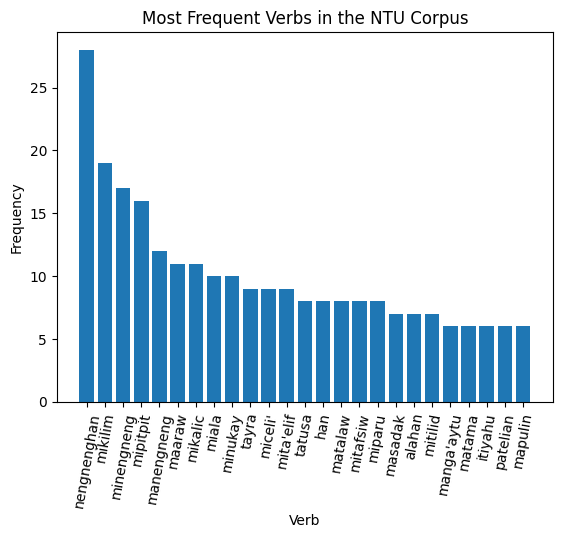

In [ ]:
# CREATE BAR GRAPH OF 25 MOST FREQUENT VERBS

# Get verbs and their frequencies in the NTU Corpus
verbs = ntu_df["Verb"].tolist()
print(verbs)

freqs = ntu_df["Frequency in NTU"].tolist()
print(freqs)

locations = [i for i in range(0, 25)]
plt.bar(locations, freqs[:25])

# Add ticks and labels to plot
myticks = range(0,25,1)
mylabels = [verbs[x] for x in myticks]
plt.xticks(ticks = myticks,
           labels = mylabels,
           rotation=80)

# Add title and label axes
plt.title("Most Frequent Verbs in the NTU Corpus")
plt.ylabel("Frequency")
plt.xlabel("Verb")
plt.show()

['PV', 'AV', 'AV', 'AV', 'PV', 'AV', 'AV', 'AV', 'AV', 'AV', 'AV', 'AV', 'unknown', 'PV', 'AV', 'AV', 'AV', 'AV', 'PV', 'AV', 'AV', 'AV', 'PV', 'PV', 'AV', 'AV', 'LV', 'unknown', 'PV', 'AV', 'AV', 'PV', 'AV', 'AV', 'unknown', 'AV', 'unknown', 'PV', 'unknown', 'PV', 'AV', 'AV', 'LV', 'AV', 'AV', 'unknown', 'AV', 'PV', 'AV', 'AV', 'AV', 'LV', 'AV', 'AV', 'LV', 'IV', 'AV', 'AV', 'AV', 'unknown', 'PV', 'AV', 'AV', 'AV', 'AV', 'AV', 'unknown', 'PV', 'AV', 'PV', 'AV', 'AV', 'AV', 'AV', 'AV', 'AV', 'unknown', 'PV', 'AV', 'unknown', 'PV', 'AV', 'unknown', 'unknown', 'LV', 'PV', 'AV', 'AV', 'unknown', 'unknown', 'unknown', 'unknown', 'PV', 'AV', 'AV', 'PV', 'PV', 'AV', 'AV', 'unknown', 'unknown', 'PV', 'AV', 'AV', 'unknown', 'PV', 'PV', 'AV', 'unknown', 'AV', 'PV', 'unknown', 'AV', 'PV', 'AV', 'unknown', 'AV', 'AV', 'AV', 'PV', 'AV', 'AV', 'AV', 'AV', 'LV', 'AV', 'unknown', 'AV', 'AV', 'unknown', 'PV', 'AV', 'unknown', 'AV', 'PV', 'AV', 'AV', 'unknown', 'unknown', 'AV', 'AV', 'unknown', 'unknow

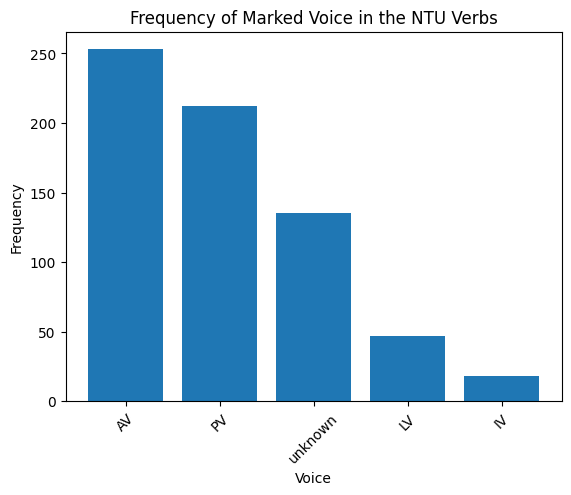

In [ ]:
# CREATE BAR GRAPH OF VOICE FREQUENCIES

# Get voices
voices = ntu_df["Voice"].tolist()
print(voices)

# Create a dictionary of voice frequencies
voice_dict = {}
for voice in voices:
  if voice not in voice_dict:
    voice_dict[voice] = 1
  else:
    voice_dict[voice] += 1

# Sort dictionary by frequency
# Create tuples of (voice, frequency)
sorted_voice = sorted(voice_dict.items(), key=lambda x: x[1], reverse=True)

new_voice = []
voice_freqs = []
# Get list of frequencies
for voice, freq in sorted_voice:
  new_voice.append(voice)
  voice_freqs.append(freq)

print(sorted_voice)

# Create bar graph
locations = [i for i in range(0, 5)]
plt.bar(locations, voice_freqs)

# Add ticks and labels to plot
myticks = range(0,5,1)
mylabels = [new_voice[x] for x in myticks]
plt.xticks(ticks = myticks,
           labels = mylabels,
           rotation=45)

# Add title and label axes
plt.title("Frequency of Marked Voice in the NTU Verbs")
plt.ylabel("Frequency")
plt.xlabel("Voice")
plt.show()

['nengneng', 'kilim', 'nengneng', 'pitpit', 'nengneng', 'araw', 'kalic', 'ala', 'nukay', 'tayra', "celi'", 'ta', 'tusa', 'han', 'ala', 'iw', 'paru', 'sadak', 'ala', 'tilid', "nga'ay", 'tama', 'itiya', 'teli', 'pulin', 'tefad', 'miheca', 'nengneng', 'cuwa', 'liyaw', 'nanam', 'han', 'emin', 'iw', 'ta', 'padang', "fana'", 'ta', 'fangcal', 'suwal', 'ala', 'tayra', 'ala', "ma'an", 'tayal', "fana'", 'lingad', 'itiya', "nga'ay", 'harek', 'nukay', 'kilang', 'tayni', 'iw', 'ta', 'enem', 'panay', "ha'en", 'licay', "nga'ay", "ma'an", 'funsia', 'herek', 'haen', 'pacuk', 'ulah', 'iw', "ka'en", 'fuhad', 'ala', 'tengil', 'lepun', '[unknown]', 'adihay', 'sa', 'edeng', "fana'", 'paru', 'rarum', 'araw', 'teli', "futi'", 'pina', 'ayaw', 'ini', 'itiya', 'herek', 'falic', 'ala', 'tihi', 'han', 'paluma', 'ta', 'epud', 'pudpud', 'ala', 'padang', '[unknown]', "'pud", 'kalic', "lisu'", "ma'an", 'sadak', 'lecad', 'tayra', 'paluma', 'tiwas', 'puhed', 'iw', 'edeng', 'ala', 'nukay', '[unknown]', 'tayal', 'emin', '

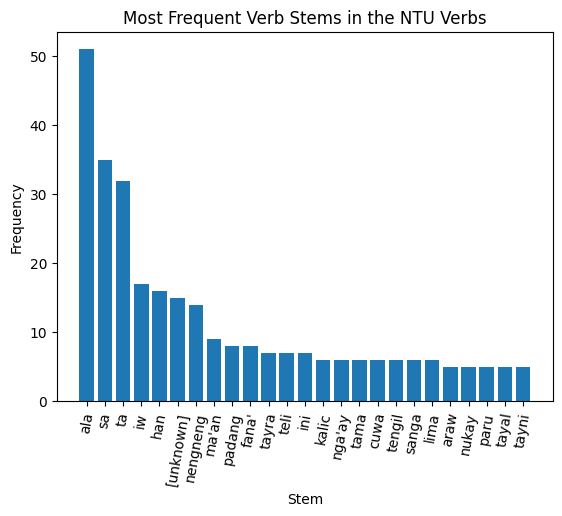

In [ ]:
# CREATE BAR GRAPH OF 25 MOST FREQUENT VERB STEMS

stems = ntu_df["Stem"].tolist()
print(stems)

# Create a dictionary of stem frequencies
stem_dict = {}
for stem in stems:
  if stem not in stem_dict:
    stem_dict[stem] = 1
  else:
    stem_dict[stem] += 1

# Sort dictionary by frequency
# Create tuples of (stem, frequency)
sorted_stem = sorted(stem_dict.items(), key=lambda x: x[1], reverse=True)

new_stems = []
stem_freqs = []
# Get list of frequencies
for stem, freq in sorted_stem:
  new_stems.append(stem)
  stem_freqs.append(freq)

print(sorted_stem)

# Create bar graph
locations = [i for i in range(0, 25)]
plt.bar(locations, stem_freqs[:25])

# Add ticks and labels to plot
myticks = range(0,25,1)
mylabels = [new_stems[x] for x in myticks]
plt.xticks(ticks = myticks,
           labels = mylabels,
           rotation=80)

# Add title and label axes
plt.title("Most Frequent Verb Stems in the NTU Verbs")
plt.ylabel("Frequency")
plt.xlabel("Stem")
plt.show()

In [ ]:
# DETERMINE HOW MANY VOICES EACH VERB STEM TAKES ON

# Group by stem
stem_group = ntu_df.groupby("Stem")

four_voices = []
three_voices = []
two_voices = []
one_voice = []

# For each stem, check how many voices occur with it
for stem, group in stem_group:
    if len(group["Voice"].unique()) == 4:
        four_voices.append(stem)
    elif len(group["Voice"].unique()) == 3:
        three_voices.append(stem)
    elif len(group["Voice"].unique()) == 2:
        two_voices.append(stem)
    elif len(group["Voice"].unique()) == 1:
        one_voice.append(stem)

print(len(four_voices), "stems occur with all 4 voices:", four_voices)
print(len(three_voices), "stems occur with 3 voices:", three_voices)
print(len(two_voices), "stems occur with 2 voices:", two_voices)
print(len(one_voice), "stems occur with only 1 voice:", one_voice)

7 stems occur with all 4 voices: ["fana'", 'kalic', 'lima', "ma'an", 'ta', 'tayni', 'tayra']
24 stems occur with 3 voices: ['[unknown]', 'araw', 'falic', 'han', 'hiya', 'iw', 'lecad', 'licay', 'nengneng', "nga'ay", 'nukay', 'padang', "ra'ur", 'ruray', 'tama', 'tayal', 'tefad', 'teli', 'tengil', 'tihi', 'tilid', 'tulu', 'tusa', 'uway']
62 stems occur with 2 voices: ["'aca", "'ayaw", 'aluman', 'angang', "ati'", "celi'", 'cumud', 'cuwa', 'edeng', 'emin', 'fangcal', 'fukil', 'fun', "futi'", 'harateng', 'harek', 'hatira', 'hayda', 'herek', 'hufuc', 'ini', 'itira', "ka'en", 'kadafu', 'kerid', 'kilim', 'kimad', 'kunkun', 'lipahak', "lisu'", 'liyaw', "luma'", 'luwad', 'matira', 'matiya', 'neng', 'ngangan', 'ngiyangi', 'pacuk', 'pafeli', 'paluma', 'paru', 'patiku', 'pina', 'pitpit', 'pudpud', 'pulin', "ra'ud", 'rakat', 'ruma', 'sadak', 'sanga', "su'elin", 'tahidang', 'tiren', "tu'as", 'tudung', 'tulas', 'tumes', 'tumus', 'ulah', 'urad']
153 stems occur with only 1 voice: ["'anuf", "'eci", "'pud



```
7 stems occur with all 4 voices: ["fana'", 'kalic', 'lima', "ma'an", 'ta', 'tayni', 'tayra']
24 stems occur with 3 voices: ['[unknown]', 'araw', 'falic', 'han', 'hiya', 'iw', 'lecad', 'licay', 'nengneng', "nga'ay", 'nukay', 'padang', "ra'ur", 'ruray', 'tama', 'tayal', 'tefad', 'teli', 'tengil', 'tihi', 'tilid', 'tulu', 'tusa', 'uway']
62 stems occur with 2 voices: ["'aca", "'ayaw", 'aluman', 'angang', "ati'", "celi'", 'cumud', 'cuwa', 'edeng', 'emin', 'fangcal', 'fukil', 'fun', "futi'", 'harateng', 'harek', 'hatira', 'hayda', 'herek', 'hufuc', 'ini', 'itira', "ka'en", 'kadafu', 'kerid', 'kilim', 'kimad', 'kunkun', 'lipahak', "lisu'", 'liyaw', "luma'", 'luwad', 'matira', 'matiya', 'neng', 'ngangan', 'ngiyangi', 'pacuk', 'pafeli', 'paluma', 'paru', 'patiku', 'pina', 'pitpit', 'pudpud', 'pulin', "ra'ud", 'rakat', 'ruma', 'sadak', 'sanga', "su'elin", 'tahidang', 'tiren', "tu'as", 'tudung', 'tulas', 'tumes', 'tumus', 'ulah', 'urad']
153 stems occur with only 1 voice: ["'anuf", "'eci", "'pud", 'acukemas', 'adihay', 'afufu', 'alul', 'aray', "aw'aw'", 'awaw', 'ayaw', "ca'a", 'cacay', 'caciyau', 'camul', 'ccay', 'cekuk', 'chunpi', "ci'ci", 'cidal', "cu'ung", 'cucuk', 'curuk', 'dadakaw', 'dadaya', 'dakaw', 'danguy', 'demak', "duka'", "e'min", 'edaw', 'efer', 'enem', 'epud', 'epung', "fafahi'", 'fahekul', 'fahinayan', 'fana', 'faw', 'filu', 'fiyuk', 'fuhad', 'funsia', 'furaw', "ha'en", 'haen', 'hakerung', 'heci', 'hemak', 'hemhem', 'hening', 'herak', 'hicurcur', 'ikur', 'ilisin', 'itiya', 'iyan', 'iyuf', 'kadkad', 'kaen', 'kanid', 'kansia', 'kawal', 'kawas', 'kayakay', 'kecur', 'kedal', 'kelid', 'keter', 'kilang', 'kinkin', 'kiyafes', "ku'ku'", 'kunira', "la'enu", "la'up", 'lafak', 'lafin', 'lawpen', "leda'", 'lekal', 'lemed', 'lemes', 'lepet', 'lepun', 'liad', 'liaw', 'lidafak', 'limed', 'limek', 'limela', 'lingad', 'litemuh', 'litmuh', 'liyas', "lu'", 'lufic', 'lukelun', 'lumed', 'lutuk', 'maan', 'miheca', 'mumuk', 'munengaw', 'mutep', 'nanam', 'nanum', 'ngaay', "niyaru'", 'pafuli', 'panay', 'pawali', 'payci', 'paytemek', "pela'", 'puhed', 'raheker', 'ranam', 'rarum', 'rayray', 'rufu', 'rulay', 'siday', 'sikin', 'sikul', 'sitatatata', 'smut', 'stul', 'sulinga', 'suni', 'suwal', 'tadem', 'tangtang', 'tapang', 'tapuh', 'teked', 'tekur', 'tenak', 'tenes', 'tild', 'tiwas', "tu'ur", 'tuas', 'tuisiu', 'turung', 'tusuk', "u'uk", 'ulung', 'ungcuy', 'ura', 'uwai', 'wacu']
```

